# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 4.9 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.6 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━

### Setup Kaggle API Key

In [2]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [15]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "ayahesham"
kaggle_key = "54740f94d2bc7a12967e3c2a9c899e29"

# Save API token the kaggle.json file
with open("/content/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms


In [14]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c csce5300-competition
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o csce5300-competition.zip


csce5300-competition.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  csce5300-competition.zip
  inflating: sample_prediction.csv   
  inflating: test_luc.csv            
  inflating: train_luc.csv           
  inflating: tutorial_code.ipynb     


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from autogluon.tabular import TabularPredictor

In [26]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train_luc.csv")
train['datetime']=pd.to_datetime(train['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [32]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000
mean,2.505559,0.031284,0.678875,1.414868,20.130401,23.578433,61.715064,12.737931,35.713647,154.868106,190.581753
std,1.116618,0.174094,0.466934,0.635363,7.940504,8.617957,19.401829,8.199027,49.667738,150.981155,181.011530
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,46.000000,7.001500,4.000000,35.000000,41.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,61.000000,11.001400,16.000000,117.000000,144.000000
75%,4.000000,0.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,48.000000,222.000000,282.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,362.000000,886.000000,977.000000


In [82]:
train.corr()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year
holiday,1.000000,-0.261289,0.027247,0.021613,0.010063,0.010490,0.060569,-0.011170,0.007303,-0.000216,0.013981,0.026266,0.028881
workingday,-0.261289,1.000000,0.008080,0.004248,-0.042038,0.020902,-0.318646,0.116545,0.009777,0.002186,0.003806,-0.008912,-0.015177
temp,0.027247,0.008080,1.000000,0.992399,-0.064663,-0.008570,0.479073,0.323455,0.401246,0.145088,-0.004602,0.290127,0.065378
atemp,0.021613,0.004248,0.992399,1.000000,-0.043438,-0.048005,0.478243,0.322273,0.400032,0.140170,-0.003393,0.301986,0.067514
humidity,0.010063,-0.042038,-0.064663,-0.043438,1.000000,-0.307589,-0.351558,-0.275160,-0.325974,-0.282597,-0.034294,0.210229,-0.097179
windspeed,0.010490,0.020902,-0.008570,-0.048005,-0.307589,1.000000,0.106504,0.100555,0.113096,0.148183,0.037040,-0.150492,-0.003323
casual,0.060569,-0.318646,0.479073,0.478243,-0.351558,0.106504,1.000000,0.500273,0.691666,0.302173,0.008939,0.118064,0.147352
registered,-0.011170,0.116545,0.323455,0.322273,-0.275160,0.100555,0.500273,1.000000,0.971367,0.379082,0.018237,0.178510,0.265397
count,0.007303,0.009777,0.401246,0.400032,-0.325974,0.113096,0.691666,0.971367,1.000000,0.399104,0.017664,0.181290,0.261798
hour,-0.000216,0.002186,0.145088,0.140170,-0.282597,0.148183,0.302173,0.379082,0.399104,1.000000,0.000470,-0.005844,-0.003627


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9174 entries, 0 to 9173
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    9174 non-null   datetime64[ns]
 1   season      9174 non-null   int64         
 2   holiday     9174 non-null   int64         
 3   workingday  9174 non-null   int64         
 4   weather     9174 non-null   int64         
 5   temp        9174 non-null   float64       
 6   atemp       9174 non-null   float64       
 7   humidity    9174 non-null   int64         
 8   windspeed   9174 non-null   float64       
 9   casual      9174 non-null   int64         
 10  registered  9174 non-null   int64         
 11  count       9174 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 860.2 KB


In [34]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test_luc.csv")
test['datetime']=pd.to_datetime(test['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-17 00:00:00,1,1,0,2,8.20,9.850,47,15.0013
1,2011-01-17 01:00:00,1,1,0,2,8.20,9.850,44,12.9980
2,2011-01-17 02:00:00,1,1,0,2,7.38,8.335,43,16.9979
3,2011-01-17 03:00:00,1,1,0,2,7.38,9.090,43,12.9980
4,2011-01-17 04:00:00,1,1,0,2,7.38,9.850,43,8.9981


In [41]:
# Same thing as train and test dataset
submission = pd.read_csv("sample_prediction.csv")
submission.head()

,datetime,count
0,2011-01-17 00:00:00,56.578956
1,2011-01-17 01:00:00,33.765150
2,2011-01-17 02:00:00,22.884537
3,2011-01-17 03:00:00,11.824137
4,2011-01-17 04:00:00,6.371916


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are predicting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [42]:
predictor = TabularPredictor(label="count",eval_metric="root_mean_squared_error",learner_kwargs={"ignored_columns": ["casual", "registered"]})
predictor.fit(train_data=train,time_limit=600,presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20221219_010924/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20221219_010924/"
AutoGluon Version:  0.6.1
Python Version:     3.8.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Aug 26 08:44:51 UTC 2022
Train Data Rows:    9174
Train Data Columns: 11
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 190.58175, 181.01153)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fea

### Review AutoGluon's training run with ranking of models that did the best.

In [43]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -52.626285      14.826278  551.094335                0.000696           0.195655            3       True         13
1   RandomForestMSE_BAG_L2  -52.915532      10.462076  427.849313                0.598070          42.189880            2       True         12
2          LightGBM_BAG_L2  -54.861448      10.299072  426.599977                0.435066          40.940544            2       True         11
3        LightGBMXT_BAG_L2  -60.645080      13.792447  467.768255                3.928441          82.108823            2       True         10
4    KNeighborsDist_BAG_L1  -83.653959       0.039309    0.021074                0.039309           0.021074            1       True          2
5      WeightedEnsemble_L2  -83.653959       0.040416    0.479344         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.01476929240607,
  'KNeighborsDist_BAG_L1': -83.65395871439821,
  'LightGBMXT_BAG_L1': -129.47215275161304,
  'LightGBM_BAG_L1': -129.4249271899828,
  'RandomForestMSE_BAG_L1': -115.19780940011783,
  'CatBoost_BAG_L1': -129.2521872415309

### Create predictions from test dataset

In [44]:
predictions = predictor.predict(test)
predictions.head()

0    18.528339
1    25.939934
2    28.068546
3    28.258150
4    27.993736
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [45]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    1712.000000
mean      161.772903
std        92.678772
min        14.439518
25%        86.017851
50%       165.751671
75%       212.988678
max       418.220154
Name: count, dtype: float64

In [49]:
# How many negative values do we have?
predictions[predictions<0].sum()

0.0

There is no negative values but just in case

In [50]:
# Set them to zero
predictions[predictions<0] = 0

### Set predictions to submission dataframe, save, and submit

In [52]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [53]:
!kaggle competitions submit -c csce5300-competition -f submission.csv -m "first raw submission"

100% 49.7k/49.7k [00:00<00:00, 223kB/s]
Successfully submitted to Prediction Competition - Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [54]:
!kaggle competitions submissions -c csce5300-competition | tail -n +1 | head -n 6

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2022-12-19 01:23:03  first raw submission  complete  172.28544    175.32223     


#### Initial score of $172.28544$

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

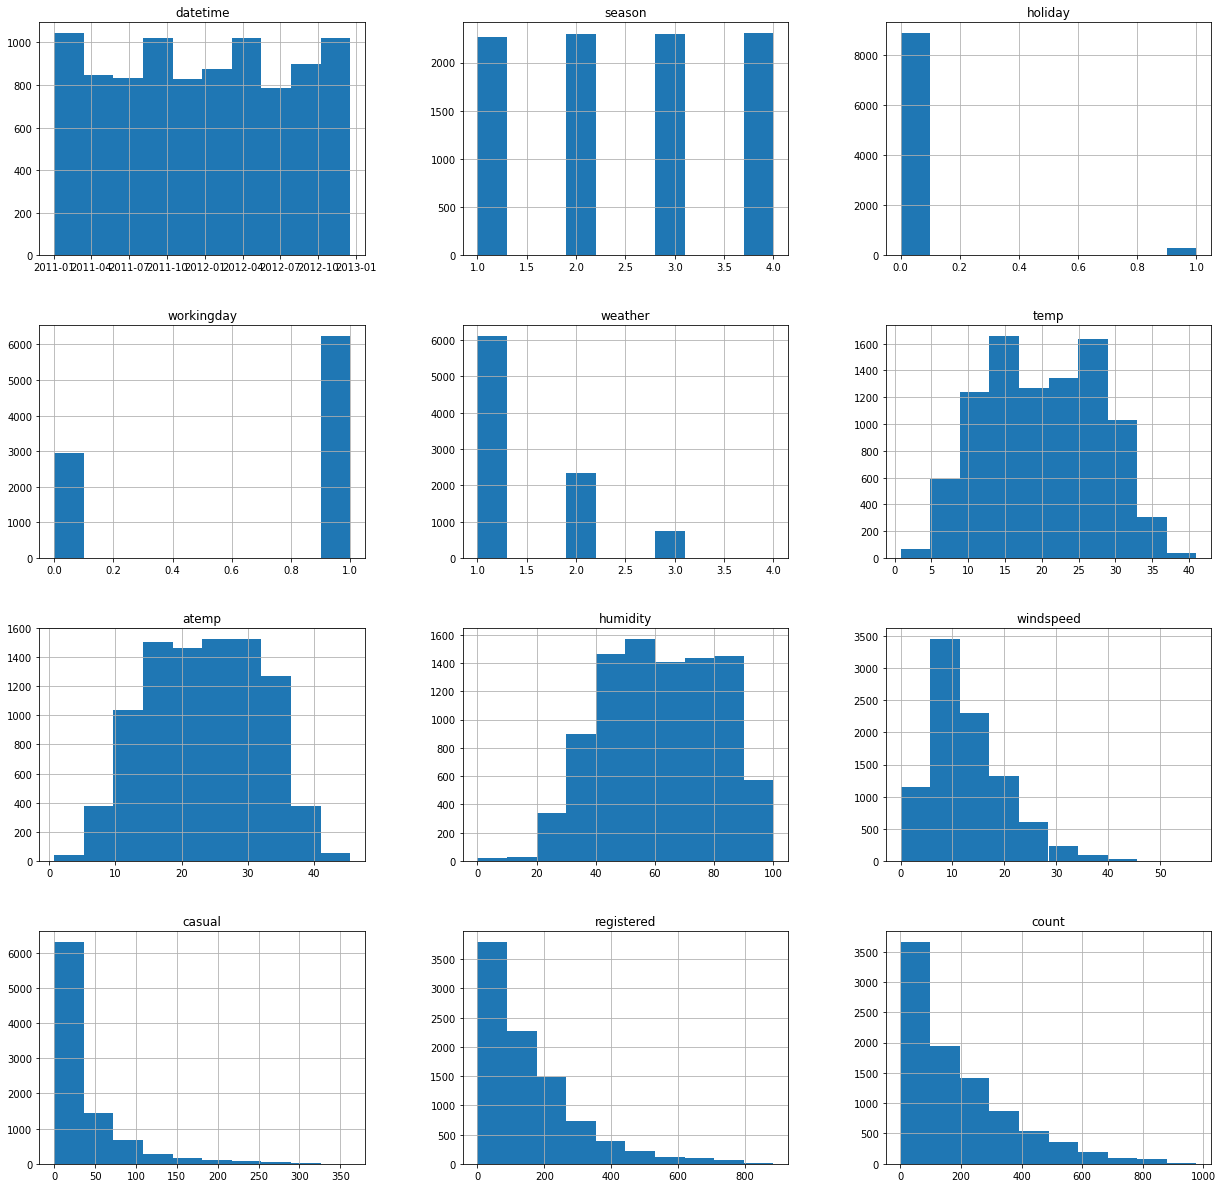

In [55]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(21,21));

In [56]:
# create a new feature
train['hour'] = train['datetime'].dt.hour 
train['day'] = train['datetime'].dt.day
train['month'] = train['datetime'].dt.month
train['year'] = train['datetime'].dt.year

test['hour'] = test['datetime'].dt.hour 
test['day'] = test['datetime'].dt.day
test['month'] = test['datetime'].dt.month
test['year'] = test['datetime'].dt.year

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [57]:
#For training set
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")

#For testing set
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [58]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1,2011


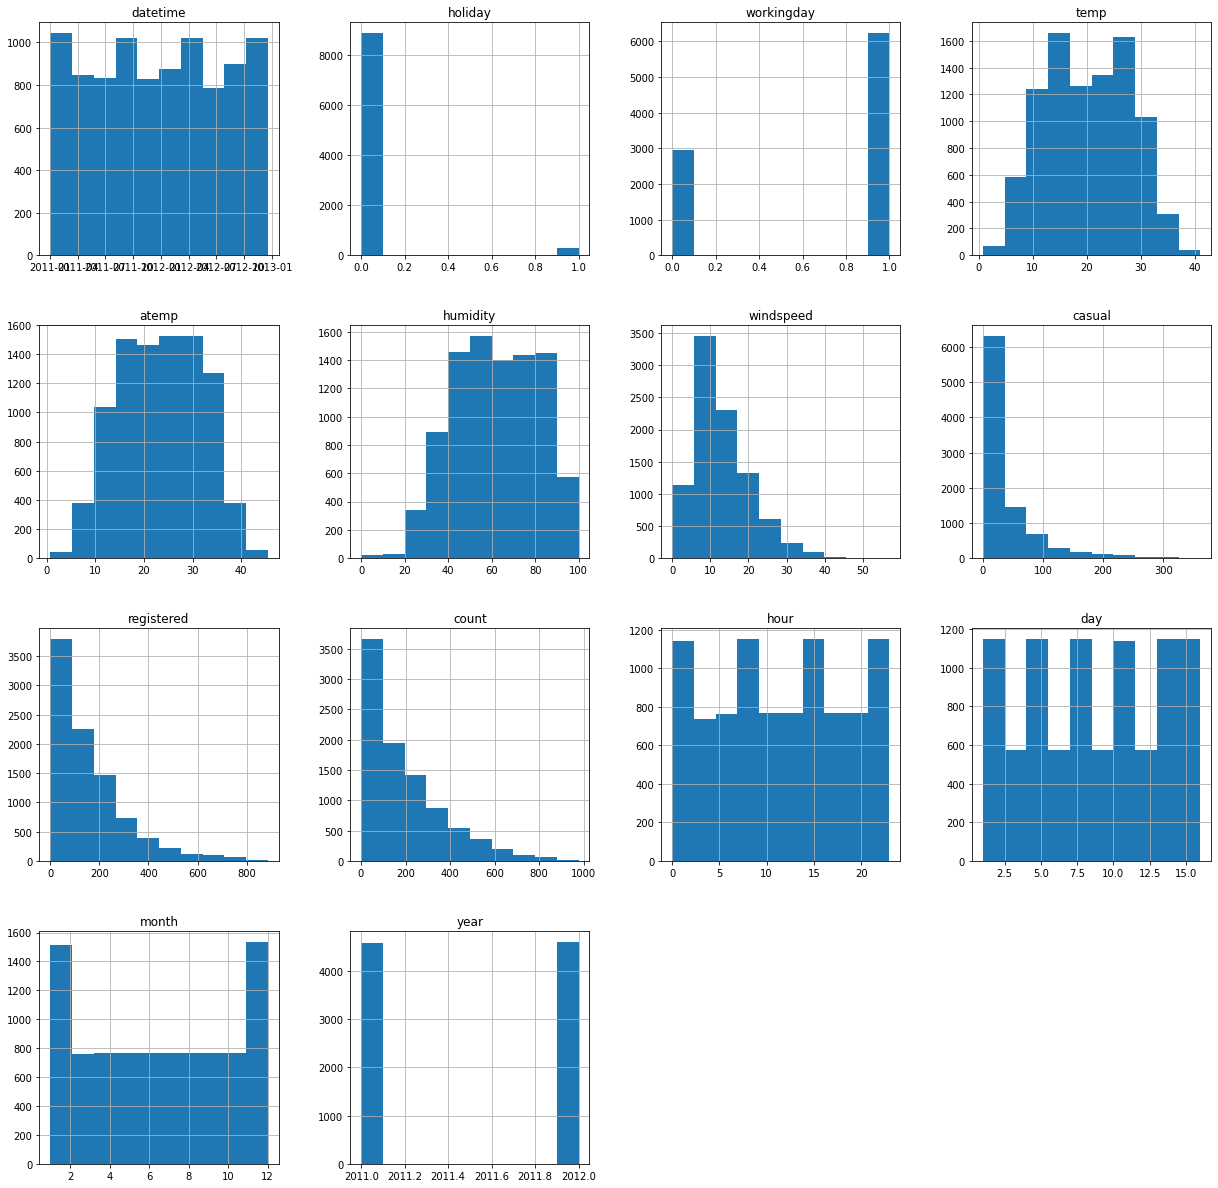

In [60]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(21,21));

## Step 5: Rerun the model with the same settings as before, just with more features

In [61]:
#Initialize a new predictor
predictor_new_features = TabularPredictor(label="count",eval_metric="root_mean_squared_error",learner_kwargs={"ignored_columns": ["casual", "registered"]})
predictor_new_features.fit(train_data=train,time_limit=600,presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20221219_013732/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20221219_013732/"
AutoGluon Version:  0.6.1
Python Version:     3.8.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Aug 26 08:44:51 UTC 2022
Train Data Rows:    9174
Train Data Columns: 15
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 190.58175, 181.01153)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fea

In [62]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.161949      19.836709  565.642904                0.000654           0.228942            3       True         14
1          CatBoost_BAG_L2  -30.320222      17.980761  466.526415                0.146976          64.571833            2       True         13
2          LightGBM_BAG_L2  -30.792455      18.275625  436.865842                0.441839          34.911260            2       True         11
3        LightGBMXT_BAG_L2  -31.272549      18.512269  433.522873                0.678484          31.568291            2       True         10
4   RandomForestMSE_BAG_L2  -31.434375      18.568757  434.362577                0.734971          32.407995            2       True         12
5      WeightedEnsemble_L2  -32.172318      16.804553  360.576144         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.01476929240607,
  'KNeighborsDist_BAG_L1': -83.65395871439821,
  'LightGBMXT_BAG_L1': -34.5224944860375,
  'LightGBM_BAG_L1': -33.72553418088521,
  'RandomForestMSE_BAG_L1': -38.6300

In [63]:
new_predictions= predictor_new_features.predict(test)

In [64]:
# Remember to set all negative values to zero
new_predictions[new_predictions<0] = 0

In [66]:
# Same submitting predictions
submission_new_features = pd.read_csv("sample_prediction.csv", parse_dates=["datetime"])
submission_new_features["count"] = new_predictions
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [67]:
!kaggle competitions submit -c csce5300-competition -f submission_new_features.csv -m "new features"

100% 49.6k/49.6k [00:00<00:00, 244kB/s]
Successfully submitted to Prediction Competition - Bike Sharing Demand

In [68]:
!kaggle competitions submissions -c csce5300-competition | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission_new_features.csv  2022-12-19 01:55:38  new features          complete  59.03387     55.35830      
submission.csv               2022-12-19 01:23:03  first raw submission  complete  172.28544    175.32223     


#### New Score of $59.03$

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [71]:
import autogluon as ag

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 150,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.core.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
}

 # hyperparameters of each model
hyperparameters = { 'GBM': gbm_options }  

time_limit = 10*60  
num_trials = 5  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # to tune hyperparameters using random search routine with a local scheduler

hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

predictor_new_hpo = TabularPredictor(label="count", eval_metric="root_mean_squared_error",learner_kwargs={"ignored_columns":
["casual", "registered"]}).fit(train_data=train, time_limit=600, presets="best_quality", hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
)

No path specified. Models will be saved in: "AutogluonModels/ag-20221219_022053/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20221219_022053/"
AutoGluon Version:  0.6.1
Python Version:     3.8.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Aug 26 08:44:51 UTC 2022
Train Data Rows:    9174
Train Data Columns: 15
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 190.58175, 181.01153)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fea

  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
Fitted model: LightGBM_BAG_L1/T1 ...
	-37.1816	 = Validation score   (-root_mean_squared_error)
	25.72s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T2 ...
	-36.9265	 = Validation score   (-root_mean_squared_error)
	26.59s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T3 ...
	-36.5832	 = Validation score   (-root_mean_squared_error)
	27.54s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T4 ...
	-102.3564	 = Validation score   (-root_mean_squared_error)
	27.18s	 = 

In [72]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                model   score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  LightGBM_BAG_L1/T3  -36.583225       0.000193  27.536598                0.000193          27.536598            1       True          3
1  LightGBM_BAG_L1/T2  -36.926495       0.000293  26.590261                0.000293          26.590261            1       True          2
2  LightGBM_BAG_L1/T1  -37.181555       0.000180  25.719655                0.000180          25.719655            1       True          1
3  LightGBM_BAG_L1/T5  -38.345714       0.000225  36.811386                0.000225          36.811386            1       True          5
4  LightGBM_BAG_L1/T4 -102.356415       0.000124  27.181819                0.000124          27.181819            1       True          4
Number of models trained: 5
Types of models trained:
{'StackerEnsembleModel_LGB'}
Bagging used: True  (with 8 

{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T5': 'StackerEnsembleModel_LGB'},
 'model_performance': {'LightGBM_BAG_L1/T1': -37.18155462126073,
  'LightGBM_BAG_L1/T2': -36.92649516550594,
  'LightGBM_BAG_L1/T3': -36.58322456039096,
  'LightGBM_BAG_L1/T4': -102.35641468819247,
  'LightGBM_BAG_L1/T5': -38.345714223522485},
 'model_best': None,
 'model_paths': {'LightGBM_BAG_L1/T1': '/content/AutogluonModels/ag-20221219_022053/models/LightGBM_BAG_L1/T1/',
  'LightGBM_BAG_L1/T2': '/content/AutogluonModels/ag-20221219_022053/models/LightGBM_BAG_L1/T2/',
  'LightGBM_BAG_L1/T3': '/content/AutogluonModels/ag-20221219_022053/models/LightGBM_BAG_L1/T3/',
  'LightGBM_BAG_L1/T4': '/content/AutogluonModels/ag-20221219_022053/models/LightGBM_BAG_L1/T4/',
  'LightGBM_BAG_L1/T5': '/content/AutogluonModels/ag

In [73]:
# Remember to set all negative values to zero
new_predictions_hpo = predictor_new_hpo.predict(test)
new_predictions_hpo[new_predictions_hpo<0] = 0

In [74]:
# Same submitting predictions
submission_new_hpo = pd.read_csv("sample_prediction.csv", parse_dates=["datetime"])
submission_new_hpo["count"] = new_predictions_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [75]:
!kaggle competitions submit -c csce5300-competition -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 49.6k/49.6k [00:00<00:00, 250kB/s]
Successfully submitted to Prediction Competition - Bike Sharing Demand

In [76]:
!kaggle competitions submissions -c csce5300-competition | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2022-12-19 02:26:16  new features with hyperparameters  complete  44.05058     39.93666      
submission_new_features.csv  2022-12-19 01:55:38  new features                       complete  59.03387     55.35830      
submission.csv               2022-12-19 01:23:03  first raw submission               complete  172.28544    175.32223     


#### New Score of $44.05$

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

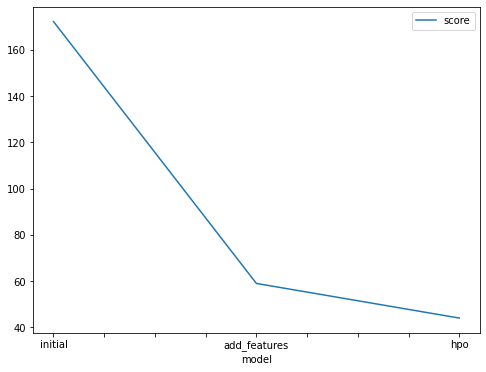

In [77]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-52.626, -30.161, -36.583]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

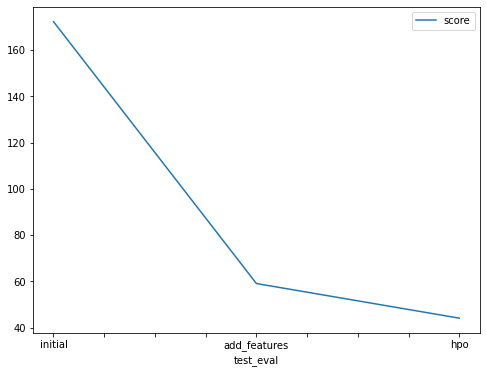

In [78]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [172.29, 59.03, 44.05]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [81]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "timelimit": ["time_limit = 600", "time_limit=600", "time_limit=600"],
    "presets": ["presets='best_quality'", "presets='best_quality'", "presets='best_quality'"],
    "num_boost_round": [100, 100 ,150],
    "score": [172.29, 59.03, 44.05]
})

,model,timelimit,presets,num_boost_round,score
0,initial,time_limit = 600,presets='best_quality',100,172.29
1,add_features,time_limit=600,presets='best_quality',100,59.03
2,hpo,time_limit=600,presets='best_quality',150,44.05
